In [2]:
import torch
from torch import nn
import torchvision.datasets as torch_data
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.l1_hidden = nn.Linear(D_in, H1)
        self.l2_hidden = nn.Linear(H1, H2)
        self.l3_out = nn.Linear(H2, D_out)

    def forward(self, x, activation=None):
        if activation is None:
            a_func = nn.SiLU()
            a1 = a_func(self.l1_hidden(x))
            a2 = a_func(self.l2_hidden(a1))
            y_hat = self.l3_out(a2)
        elif activation == "sigmoid":
            a1 = torch.sigmoid(self.l1_hidden(x))
            a2 = torch.sigmoid(self.l2_hidden(a1))
            y_hat = self.l3_out(a2)
        elif activation == "tanh":
            a1 = torch.tanh(self.l1_hidden(x))
            a2 = torch.tanh(self.l2_hidden(a1))
            y_hat = self.l3_out(a2)
        elif activation == "relu":
            a1 = torch.relu(self.l1_hidden(x))
            a2 = torch.relu(self.l2_hidden(a1))
            y_hat = self.l3_out(a2)
        return y_hat

In [4]:
# can also use the Sequential API

# D_in = 5
# H1 = 4
# H2 = 4
# D_out = 2
#
# model = nn.Sequential(
#     nn.Linear(D_in, H1),
#     nn.SiLU(),
#     nn.Linear(H1, H2),
#     nn.SiLU(),
#     nn.Linear(H2, D_out)
# )

In [5]:
train_data = torch_data.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
validation_data = torch_data.MNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())

In [6]:
train_loader = DataLoader(train_data, batch_size=128)
validation_loader = DataLoader(validation_data, batch_size=5000)

In [7]:
criterion = nn.CrossEntropyLoss()

In [8]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=5):
    metrics = {
        "training_loss": [],
        "validation_accuracy": []
    }
    for epoch in range(epochs):
        print(f"########## Starting epoch {epoch + 1} ##########")
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            y_hat = model(x.view(-1, 28 * 28))
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()

        metrics["training_loss"].append(loss.item())
        print(f"Train epoch {epoch + 1} finished.")
        print(f"\tTrain Loss: {loss.item()}")

        correct = 0
        for x, y in validation_loader:
            y_hat = model(x.view(-1, 28 * 28))
            _, label = torch.max(y_hat, 1)
            correct += (label == y).sum().item()
        acc = 100 * (correct / len(validation_data))

        metrics["validation_accuracy"].append(acc)
        print(f"\tValidation Acc: {acc}")

    return metrics

In [9]:
model = Net(784, 128, 128, 10)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_metrics = train(model, criterion, train_loader, validation_loader, optimizer, epochs=20)

########## Starting epoch 1 ##########
Train epoch 1 finished.
	Train Loss: 0.27795395255088806
	Validation Acc: 95.42
########## Starting epoch 2 ##########
Train epoch 2 finished.
	Train Loss: 0.18669460713863373
	Validation Acc: 95.45
########## Starting epoch 3 ##########
Train epoch 3 finished.
	Train Loss: 0.2650325894355774
	Validation Acc: 94.28
########## Starting epoch 4 ##########
Train epoch 4 finished.
	Train Loss: 0.18133170902729034
	Validation Acc: 96.12
########## Starting epoch 5 ##########
Train epoch 5 finished.
	Train Loss: 0.15105676651000977
	Validation Acc: 96.22
########## Starting epoch 6 ##########
Train epoch 6 finished.
	Train Loss: 0.10691729933023453
	Validation Acc: 96.95
########## Starting epoch 7 ##########
Train epoch 7 finished.
	Train Loss: 0.05282703414559364
	Validation Acc: 96.23
########## Starting epoch 8 ##########
Train epoch 8 finished.
	Train Loss: 0.08510714024305344
	Validation Acc: 96.54
########## Starting epoch 9 ##########
Train epoc

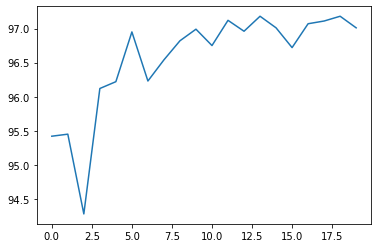

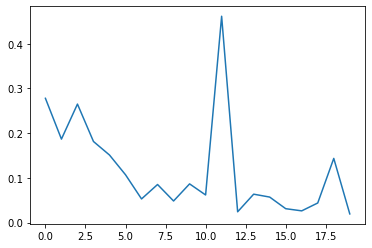

In [10]:
# plot the data
plt.plot(train_metrics["validation_accuracy"], label="Accuracy")
plt.show()
plt.plot(train_metrics["training_loss"], label="Loss")
plt.show()